# Rating Prediction Project

## PROBLEM STATEMENT:
**We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.**

### 1)Data Collection Phase:
**You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.
Basically, we need these columns**
- **1) reviews of the product.**
- **2) rating of the product.**

**You can fetch other data as well, if you think data can be useful or can help in the project.It 
completely depends on your imagination or assumption.**

### 2)Model Building Phase:
**After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.**
**Follow the complete life cycle of data science. Include all the steps like**
- **1. Data Cleaning**
- **2. Exploratory Data Analysis**
- **3. Data Preprocessing**
- **4. Model Building**
- **5. Model Evaluation**
- **6. Selecting the best model**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
#to import dataset
dfr = pd.read_csv('Data.csv') 
dfr

,Unnamed: 0,Comment,Rating
0,0,If you want to buy under 15k then go for it. S...,5.0
1,1,Camera: -2/10 Ye 10k ke below price deserve kr...,5.0
2,2,"I bought 6gb/128gb variant foer12,600. This is...",5.0
3,3,Overall after 7 days of usage this is the beas...,5.0
4,4,All the features are very nice in this mobile....,5.0
...,...,...,...
37750,37750,"Value for money, I purchased this non branded ...",4.0
37751,37751,Picture quality is very low ...it's not 1+8gp ...,4.0
37752,37752,Looking is good and love it,4.0
37753,37753,Very nice picture quality and aap support it j...,5.0


In [3]:
dfr.shape

(37755, 3)

In [4]:
#Getting general information of the data.
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37755 entries, 0 to 37754
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37755 non-null  int64  
 1   Comment     36825 non-null  object 
 2   Rating      37755 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 885.0+ KB


In [5]:
#Finding the null values in the columns of dataset
dfr.isnull().sum()

Unnamed: 0      0
Comment       930
Rating          0
dtype: int64

There are 930 null values present in comment column

In [6]:
dfr[dfr['Comment'].isnull()].index

Int64Index([   61,    81,   136,   188,   190,   201,   245,   255,   269,
              289,
            ...
            34170, 34178, 34186, 34194, 34202, 34665, 35227, 35233, 35246,
            35251],
           dtype='int64', length=930)

In [7]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in dfr:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((dfr[c] == s).sum())

  in Unnamed: 0 =  0
? in Unnamed: 0 =  0
- in Unnamed: 0 =  0
 ? in Unnamed: 0 =  0
 - in Unnamed: 0 =  0
?  in Unnamed: 0 =  0
-  in Unnamed: 0 =  0
 ?  in Unnamed: 0 =  0
 -  in Unnamed: 0 =  0
NA in Unnamed: 0 =  0
N/A in Unnamed: 0 =  0
 NA in Unnamed: 0 =  0
 N/A in Unnamed: 0 =  0
  in Comment =  0
? in Comment =  0
- in Comment =  2
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  0
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


In [8]:
print(dfr["Rating"].value_counts())

5.0    9694
4.0    7576
1.0    7302
3.0    6752
2.0    6431
Name: Rating, dtype: int64


### Dataset Description

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

Columns:

Comment: The Comments on various products

Rating: User Rating out of 5.

### Data Cleaning

In [9]:
dfr.dropna(inplace=True)

In [10]:
#Droping unnecessary column
dfr = dfr.drop(["Unnamed: 0"],axis=1)

In [11]:
dfr.shape

(36825, 2)

In [12]:
# Replacing the string entries in target column
dfr['Rating'] = dfr['Rating'].replace('1.0',1)
dfr['Rating'] = dfr['Rating'].replace('2.0',2)
dfr['Rating'] = dfr['Rating'].replace('3.0',3)
dfr['Rating'] = dfr['Rating'].replace('4.0',4)
dfr['Rating'] = dfr['Rating'].replace('5.0',5)
dfr['Rating'] = dfr['Rating'].replace('5',5)
dfr['Rating'] = dfr['Rating'].replace('4',4)
dfr['Rating'] = dfr['Rating'].replace('3',3)

In [13]:
print(dfr["Rating"].value_counts())

5.0    9382
4.0    7322
1.0    7182
3.0    6591
2.0    6348
Name: Rating, dtype: int64


In [14]:
print(dfr["Rating"].mode())

0    5.0
Name: Rating, dtype: float64


In [15]:
# replacing '-' with mode which is 5
dfr['Rating'] = dfr.Rating.replace('-', '5')

In [16]:
print(dfr["Rating"].value_counts())

5.0    9382
4.0    7322
1.0    7182
3.0    6591
2.0    6348
Name: Rating, dtype: int64


In [17]:
dfr['Rating'] = dfr['Rating'].replace('5',5)

In [18]:
print(dfr["Rating"].value_counts())

5.0    9382
4.0    7322
1.0    7182
3.0    6591
2.0    6348
Name: Rating, dtype: int64


In [19]:
# deleting rows with no comments instead '-' sign
index_name = dfr[ dfr['Comment'] == '-' ].index
index_name

Int64Index([19340, 30959], dtype='int64')

In [20]:
dfr.drop(index_name , inplace=True)

In [21]:
dfr.shape

(36823, 2)

In [22]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in dfr:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((dfr[c] == s).sum())

  in Comment =  0
? in Comment =  0
- in Comment =  0
 ? in Comment =  0
 - in Comment =  0
?  in Comment =  0
-  in Comment =  0
 ?  in Comment =  0
 -  in Comment =  0
NA in Comment =  0
N/A in Comment =  0
 NA in Comment =  0
 N/A in Comment =  0
  in Rating =  0
? in Rating =  0
- in Rating =  0
 ? in Rating =  0
 - in Rating =  0
?  in Rating =  0
-  in Rating =  0
 ?  in Rating =  0
 -  in Rating =  0
NA in Rating =  0
N/A in Rating =  0
 NA in Rating =  0
 N/A in Rating =  0


Now there are no blank spaces, random characters in the columns

In [23]:
# to change data type
dfr["Rating"] = dfr.Rating.astype('int')

In [24]:
dfr.dtypes

Comment    object
Rating      int32
dtype: object

## visualization

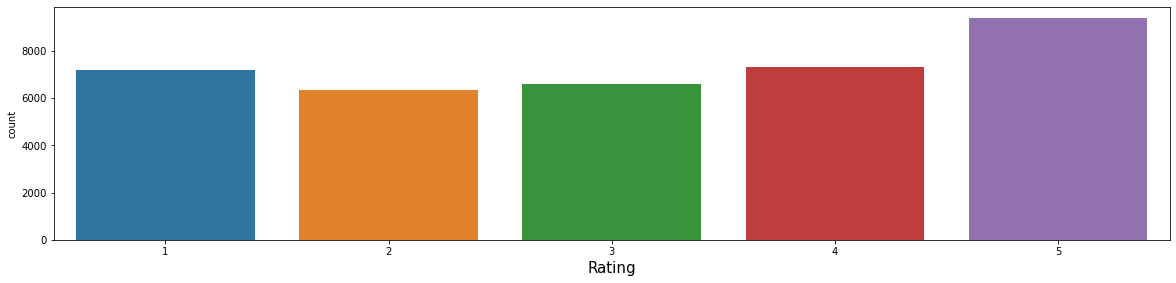

In [25]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in dfr.drop(columns = ['Comment'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(dfr[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

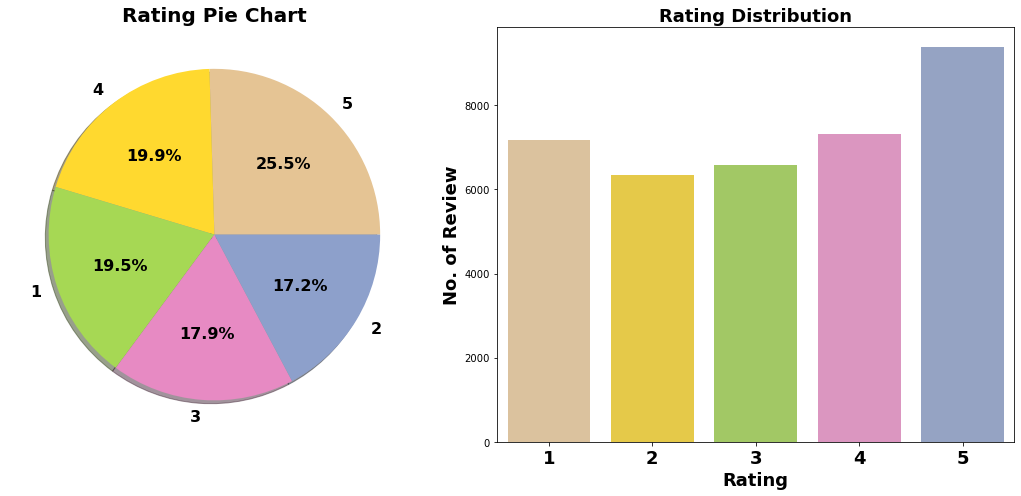

Value Counts of Rating:


5    9382
4    7320
1    7182
3    6591
2    6348
Name: Rating, dtype: int64

In [26]:
#Exploration of Target Variable Ratings
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
dfr['Rating'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Rating Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Rating',data=dfr,ax=ax[1])
ax[1].set_title('Rating Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Rating",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
dfr['Rating'].value_counts()


In [27]:
#Creating a length column with records of total string length of each comment text
dfr['Stringlength'] = dfr['Comment'].str.len()
dfr.head()

,Comment,Rating,Stringlength
0,If you want to buy under 15k then go for it. S...,5,896
1,Camera: -2/10 Ye 10k ke below price deserve kr...,5,875
2,"I bought 6gb/128gb variant foer12,600. This is...",5,440
3,Overall after 7 days of usage this is the beas...,5,694
4,All the features are very nice in this mobile....,5,151


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

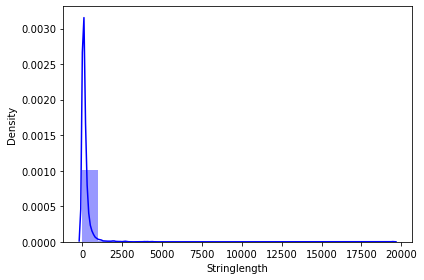

In [28]:
#Distribution of string length
sns.distplot(dfr.Stringlength, bins=20, color = 'blue')

most reviews are between 0 and 800 words

### Data Pre Processing

In [29]:
import re
import string

In [30]:
# Convert all messages to lower case
dfr['Comment'] = dfr['Comment'].str.lower()


dfr['Comment'] = dfr['Comment'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
dfr['Comment'] = dfr['Comment'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


dfr['Comment'] = dfr['Comment'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
dfr['Comment'] = dfr['Comment'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

dfr['Comment'] = dfr['Comment'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


dfr['Comment'] = dfr['Comment'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

dfr['Comment'] = dfr['Comment'].str.replace(r'[\_]',' ') #removing underscore characters

dfr['Comment'] = dfr['Comment'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

dfr['Comment'] = dfr['Comment'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

dfr['Comment'] = dfr['Comment'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace

In [31]:
dfr

,Comment,Rating,Stringlength
0,if you want to buy under numk then go for it s...,5,896
1,camera num num ye numk ke below price deserve ...,5,875
2,i bought numgb numgb variant foernum num this ...,5,440
3,overall after num days of usage this is the be...,5,694
4,all the features are very nice in this mobile ...,5,151
...,...,...,...
37750,value for money purchased this non branded tv ...,4,340
37751,picture quality is very low it not num numgp n...,4,154
37752,looking is good and love it,4,27
37753,very nice picture quality and aap support it j...,5,57


In [32]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
dfr['Comment'] = dfr['Comment'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [34]:
lem=WordNetLemmatizer()
dfr['Comment'] = dfr['Comment'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in str(x).split()))

In [35]:
dfr

,Comment,Rating,Stringlength
0,want buy numk go superb product pro num moth f...,5,896
1,camera num num ye numk ke price deserve krta h...,5,875
2,bought numgb numgb variant foernum num best ph...,5,440
3,overall num day usage beast segment display be...,5,694
4,feature nice mobile nummp camera long life bat...,5,151
...,...,...,...
37750,value money purchased non branded tv num used ...,4,340
37751,picture quality low num numgp num numgp bye pr...,4,154
37752,looking good love,4,27
37753,nice picture quality aap support amazing,5,57


In [36]:
dfr['Cleaned_Stringlength'] = dfr['Comment'].str.len()
dfr.head()

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,want buy numk go superb product pro num moth f...,5,896,746
1,camera num num ye numk ke price deserve krta h...,5,875,708
2,bought numgb numgb variant foernum num best ph...,5,440,356
3,overall num day usage beast segment display be...,5,694,473
4,feature nice mobile nummp camera long life bat...,5,151,99


In [37]:
dfr

,Comment,Rating,Stringlength,Cleaned_Stringlength
0,want buy numk go superb product pro num moth f...,5,896,746
1,camera num num ye numk ke price deserve krta h...,5,875,708
2,bought numgb numgb variant foernum num best ph...,5,440,356
3,overall num day usage beast segment display be...,5,694,473
4,feature nice mobile nummp camera long life bat...,5,151,99
...,...,...,...,...
37750,value money purchased non branded tv num used ...,4,340,208
37751,picture quality low num numgp num numgp bye pr...,4,154,92
37752,looking good love,4,27,17
37753,nice picture quality aap support amazing,5,57,40


<AxesSubplot:xlabel='Cleaned_Stringlength', ylabel='Density'>

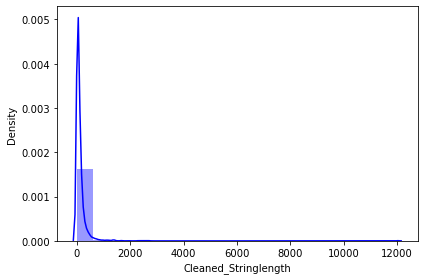

In [38]:
#Distribution of cleaned string length
sns.distplot(dfr.Cleaned_Stringlength, bins=20, color = 'blue')

After cleaning data coments are between 0-500 length.

In [39]:
from wordcloud import WordCloud

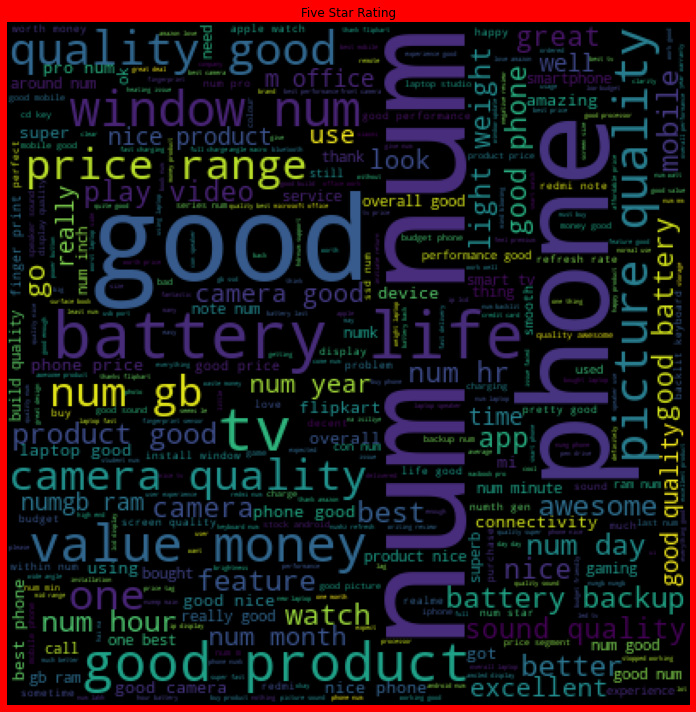

In [40]:
five=dfr['Comment'][dfr['Rating']==5]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(five))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Five Star Rating')
plt.show()

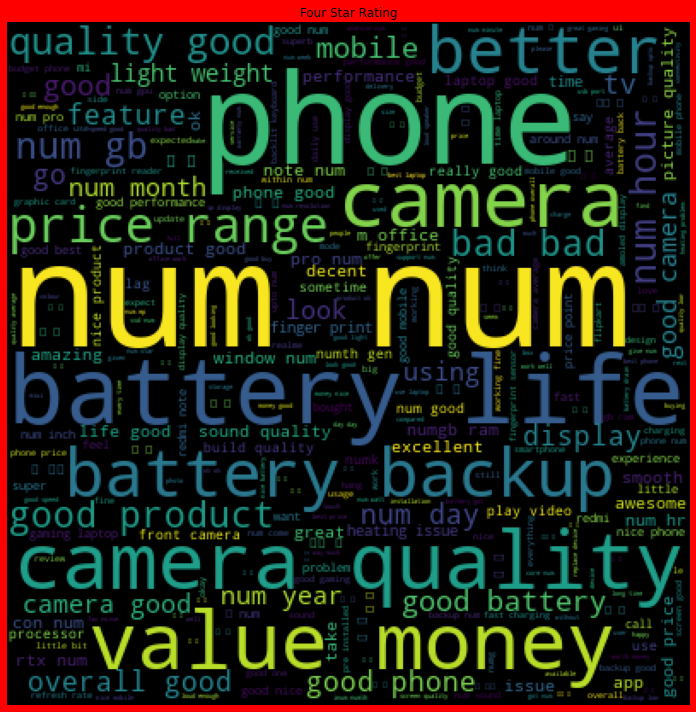

In [41]:
four=dfr['Comment'][dfr['Rating']==4]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(four))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Four Star Rating')
plt.show()

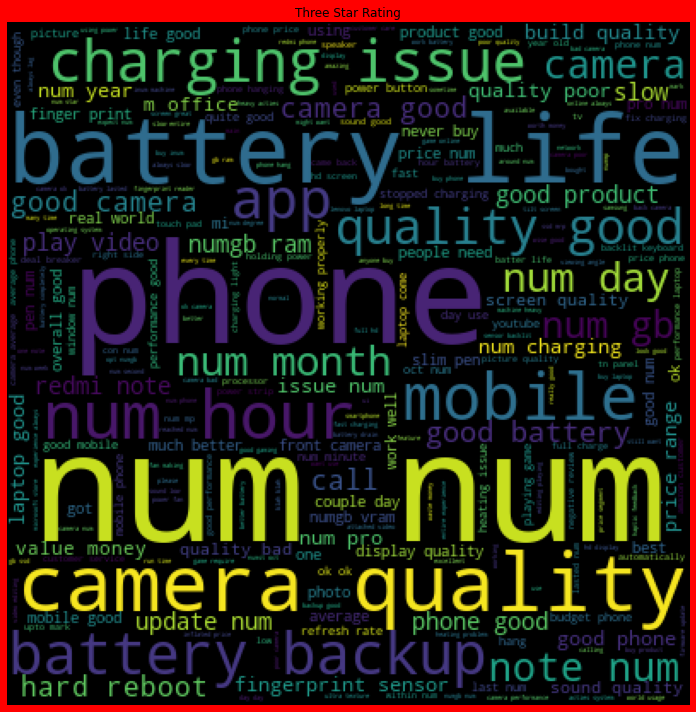

In [42]:
three=dfr['Comment'][dfr['Rating']==3]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(three))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Three Star Rating')
plt.show()

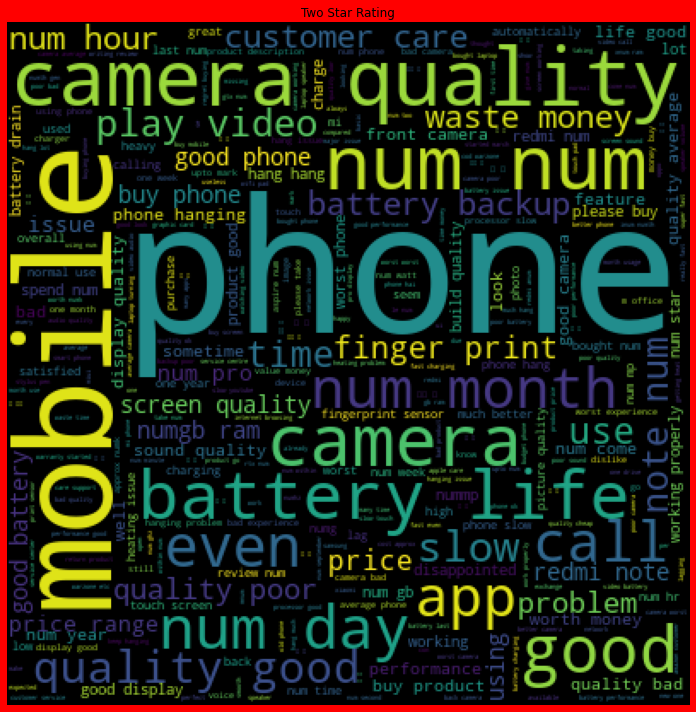

In [43]:
two=dfr['Comment'][dfr['Rating']==2]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(two))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Two Star Rating')
plt.show()

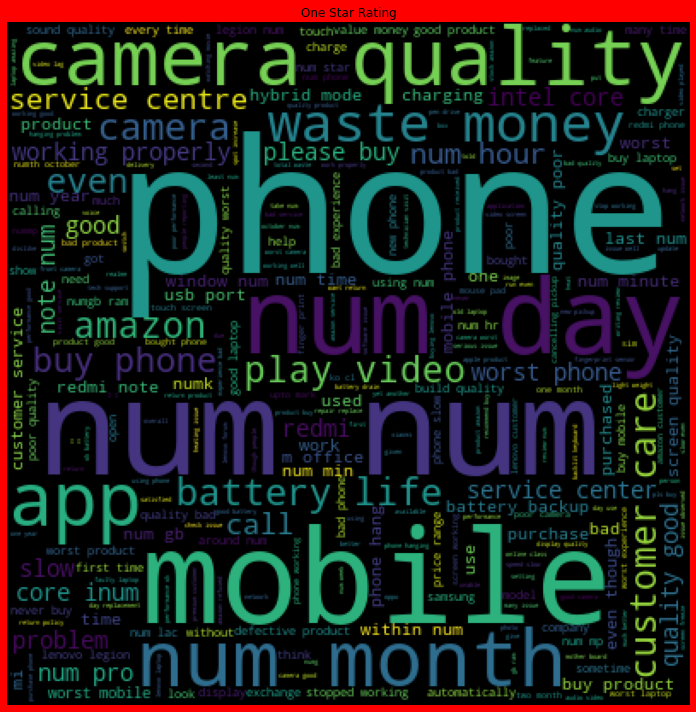

In [44]:
one=dfr['Comment'][dfr['Rating']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(one))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='One Star Rating')
plt.show()

From the graphs above the following observations are made:
* Reviews corresponding to 5.0 rating frequently carry words like: ‘good’,’excellent’,’quality’, ‘value money’ etc indicating very high customer satisfaction and high quality product.
* Reviews corresponding to 4.0 rating frequently carry words like: ‘good’,’great’,’performance’,’features’, ‘quality’,’price’ etc indicating high customer satisfaction
and good quality product.
* Reviews corresponding to 3.0 rating frequently carry words
like: ‘good’,’well’,’average,’quality’,’issue’ etc indicating
customer dissatisfaction and average to below average
product quality.
* Reviews corresponding to 2.0 rating frequently carry words like: ‘problem’, ‘bad’,’issues’, ’waste money’,’poor quality’ etc indicating high customer dissatisfaction and below average product quality.
* Reviews corresponding to 1.0 rating frequently carry words like: ‘stopped’, ’working’, ’cheap’, ’return’, ’issue’, ’waste money’, ’poor quality’,’ customer care’, ’bad’, ‘poor build quality’ etc indicate very high customerdissatisfaction and poor quality product.


Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they do not contribute to model building

In [45]:
dfr.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)

In [46]:
from collections import Counter

In [47]:
fiv = Counter(",".join(dfr[dfr['Rating']==5]["Comment"]).split()).most_common(10)
fr = Counter(",".join(dfr[dfr['Rating']==4]["Comment"]).split()).most_common(10)
thr = Counter(",".join(dfr[dfr['Rating']==3]["Comment"]).split()).most_common(10)
tw = Counter(",".join(dfr[dfr['Rating']==2]["Comment"]).split()).most_common(10)
one = Counter(",".join(dfr[dfr['Rating']==1]["Comment"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Words and Ratings,with their counts")
Countdf['Five Star Words']=fiv
Countdf['Four Star Words']=fr
Countdf['Three Star Words']=thr
Countdf['Two Star Words']=tw
Countdf['One Star Words']=one
Countdf.head(10)

TOP 10 Words and Ratings,with their counts


,Five Star Words,Four Star Words,Three Star Words,Two Star Words,One Star Words
0,"(num, 7736)","(num, 7444)","(num, 6232)","(num, 3808)","(num, 6488)"
1,"(good, 3330)","(good, 3130)","(good, 2581)","(phone, 1879)","(phone, 3382)"
2,"(phone, 2060)","(phone, 1779)","(phone, 2023)","(good, 1559)","(laptop, 2063)"
3,"(laptop, 2055)","(battery, 1743)","(battery, 1887)","(quality, 1346)","(product, 1630)"
4,"(quality, 1748)","(laptop, 1565)","(laptop, 1708)","(camera, 1156)","(amazon, 1467)"
5,"(battery, 1546)","(camera, 1450)","(camera, 1594)","(battery, 915)","(issue, 1449)"
6,"(product, 1492)","(quality, 1417)","(quality, 1453)","(laptop, 849)","(quality, 1429)"
7,"(camera, 1230)","(क, 1261)","(issue, 1195)","(product, 722)","(good, 1398)"
8,"(price, 1150)","(price, 1030)","(screen, 945)","(buy, 638)","(buy, 1364)"
9,"(tv, 883)","(product, 813)","(life, 925)","(also, 630)","(camera, 1211)"


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [50]:
features = tf_vec.fit_transform(dfr['Comment'])

In [51]:
X = features
y=dfr['Rating']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Balancing out classes in Label column using SMOTE technique.

In [53]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

### This is a Classification problem since Target column ('Rating') has Catergorical type of Data.

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
maxAcc = 0
maxRS=0
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.7080224543452001 on random_state: 5


In [56]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state =5 )

In [57]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [58]:
RFC = RandomForestClassifier()
adbc = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()
pc= PassiveAggressiveClassifier()

### Training the Models

In [59]:
RFC.fit(x_train,y_train)
adbc.fit(x_train,y_train)
LOGR.fit(x_train,y_train)
MNB.fit(x_train,y_train)
CNB.fit(x_train,y_train)
pc.fit(x_train,y_train)

PassiveAggressiveClassifier()

All Models have been trained.

### Logistic Regression Model Accuracy

In [60]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [61]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[1843,  462,  213,  115,  180],
       [ 494, 1596,  385,  143,  208],
       [ 288,  364, 1568,  284,  298],
       [ 165,  214,  376, 1264,  754],
       [ 231,  129,  202,  475, 1822]], dtype=int64)

In [62]:
print(accu)

              precision    recall  f1-score   support

           1       0.61      0.66      0.63      2813
           2       0.58      0.56      0.57      2826
           3       0.57      0.56      0.57      2802
           4       0.55      0.46      0.50      2773
           5       0.56      0.64      0.60      2859

    accuracy                           0.58     14073
   macro avg       0.57      0.57      0.57     14073
weighted avg       0.57      0.58      0.57     14073



### Random Forest Classifier Model Accuracy

In [63]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [64]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[2251,  214,  106,   94,  148],
       [ 338, 2025,  200,  144,  119],
       [ 204,  130, 1957,  284,  227],
       [ 132,   66,  230, 1768,  577],
       [ 203,   63,  123,  470, 2000]], dtype=int64)

In [65]:
print(accu)

              precision    recall  f1-score   support

           1       0.72      0.80      0.76      2813
           2       0.81      0.72      0.76      2826
           3       0.75      0.70      0.72      2802
           4       0.64      0.64      0.64      2773
           5       0.65      0.70      0.67      2859

    accuracy                           0.71     14073
   macro avg       0.71      0.71      0.71     14073
weighted avg       0.71      0.71      0.71     14073



### Multinomial Naive Bayes Model Accuracy

In [66]:
MNBpred = MNB.predict(x_test)
accu = classification_report(y_test,MNBpred)

In [67]:
conf_matrx = confusion_matrix(y_test,MNBpred)

In [68]:
conf_matrx

array([[1817,  396,  268,  159,  173],
       [ 537, 1457,  439,  224,  169],
       [ 339,  305, 1524,  391,  243],
       [ 191,  150,  416, 1451,  565],
       [ 242,   82,  217,  734, 1584]], dtype=int64)

In [69]:
print(accu)

              precision    recall  f1-score   support

           1       0.58      0.65      0.61      2813
           2       0.61      0.52      0.56      2826
           3       0.53      0.54      0.54      2802
           4       0.49      0.52      0.51      2773
           5       0.58      0.55      0.57      2859

    accuracy                           0.56     14073
   macro avg       0.56      0.56      0.56     14073
weighted avg       0.56      0.56      0.56     14073



### Complement Naive Bayes Model Accuracy

In [70]:
CNBpred = CNB.predict(x_test)
accu = classification_report(y_test,CNBpred)

In [71]:
conf_matrx = confusion_matrix(y_test,CNBpred)

In [72]:
conf_matrx

array([[1884,  379,  241,  135,  174],
       [ 577, 1451,  388,  220,  190],
       [ 379,  301, 1472,  362,  288],
       [ 233,  157,  355, 1366,  662],
       [ 254,  126,  180,  612, 1687]], dtype=int64)

In [73]:
print(accu)

              precision    recall  f1-score   support

           1       0.57      0.67      0.61      2813
           2       0.60      0.51      0.55      2826
           3       0.56      0.53      0.54      2802
           4       0.51      0.49      0.50      2773
           5       0.56      0.59      0.58      2859

    accuracy                           0.56     14073
   macro avg       0.56      0.56      0.56     14073
weighted avg       0.56      0.56      0.56     14073



### Passive Aggressive Classifier Model Accuracy

In [74]:
pcpred = pc.predict(x_test)
accu = classification_report(y_test,pcpred)

In [75]:
conf_matrx = confusion_matrix(y_test,pcpred)

In [76]:
conf_matrx

array([[1852,  446,  175,  131,  209],
       [ 338, 1895,  242,  196,  155],
       [ 221,  415, 1586,  328,  252],
       [ 147,  309,  260, 1467,  590],
       [ 230,  269,  193,  589, 1578]], dtype=int64)

In [77]:
print(accu)

              precision    recall  f1-score   support

           1       0.66      0.66      0.66      2813
           2       0.57      0.67      0.62      2826
           3       0.65      0.57      0.60      2802
           4       0.54      0.53      0.54      2773
           5       0.57      0.55      0.56      2859

    accuracy                           0.60     14073
   macro avg       0.60      0.60      0.59     14073
weighted avg       0.60      0.60      0.59     14073



### AdaBoost Classifier Model Accuracy

In [78]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [79]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[1377,  914,  228,  136,  158],
       [ 767, 1287,  332,  278,  162],
       [ 448, 1007,  623,  466,  258],
       [ 233,  650,  359,  981,  550],
       [ 298,  503,  173,  787, 1098]], dtype=int64)

In [80]:
print(accu)

              precision    recall  f1-score   support

           1       0.44      0.49      0.46      2813
           2       0.30      0.46      0.36      2826
           3       0.36      0.22      0.28      2802
           4       0.37      0.35      0.36      2773
           5       0.49      0.38      0.43      2859

    accuracy                           0.38     14073
   macro avg       0.39      0.38      0.38     14073
weighted avg       0.39      0.38      0.38     14073



### Model Cross Validation

In [81]:
from sklearn.model_selection import cross_val_score as cvs

Logistic Regression

In [82]:
print(cvs(LOGR,smt_x,smt_y,cv=5).mean()) 

0.5022383287145598


Random Forest Classifier

In [83]:
print(cvs(RFC,smt_x,smt_y,cv=5).mean())

0.6533788104881688


Multinomial Naive Bayes

In [84]:
print(cvs(MNB,smt_x,smt_y,cv=5).mean())

0.4816243871242805


Complement Naive Bayes

In [85]:
print(cvs(CNB,smt_x,smt_y,cv=5).mean())

0.4879982946066937


Passive Aggressive Classifier

In [86]:
print(cvs(pc,smt_x,smt_y,cv=5).mean())

0.5479215519079087


Adaboost Classifier

In [87]:
print(cvs(adbc,smt_x,smt_y,cv=5).mean())

0.3397569814538478


### ROC AUC curves

In [88]:
import scikitplot as sktplt

In [89]:
lr_prob = LOGR.predict_proba(x_test)
rf_prob = RFC.predict_proba(x_test)
adbc_prob = adbc.predict_proba(x_test)
mnb_prob = MNB.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

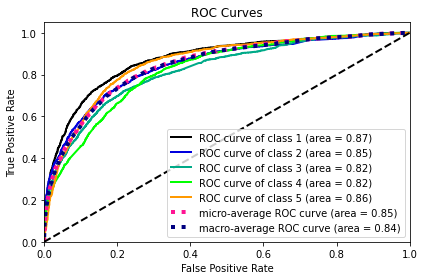

In [90]:
sktplt.metrics.plot_roc(y_test,lr_prob) #Logistic Regression ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

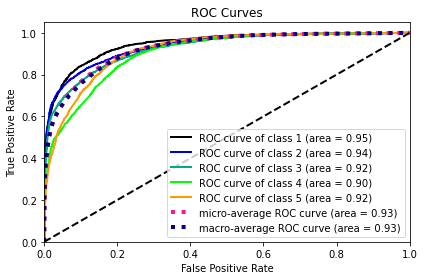

In [91]:
sktplt.metrics.plot_roc(y_test,rf_prob) # Random Forest Classifier ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

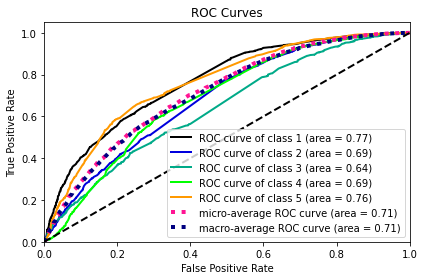

In [92]:
sktplt.metrics.plot_roc(y_test,adbc_prob) # Ada Boost Classifier ROC Curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

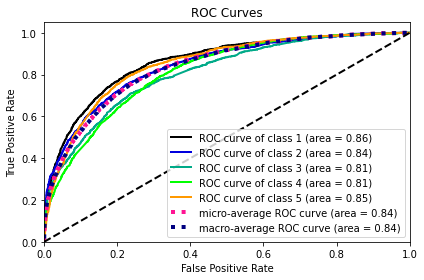

In [93]:
sktplt.metrics.plot_roc(y_test,mnb_prob) #Multinomial Naive Bayes ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

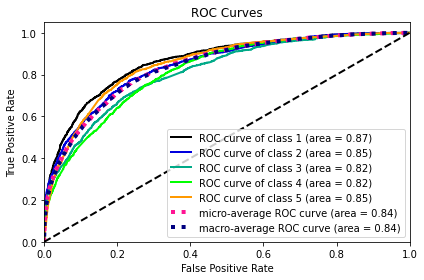

In [94]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves

### ROC AUC Scores

Logistic Regression

In [95]:
roc_auc_score(y_test,lr_prob,multi_class='ovo')

0.8435712964886768

Multinomial Naive Bayes

In [96]:
roc_auc_score(y_test,mnb_prob,multi_class='ovo')

0.8357688293313146

Complement Naive Bayes

In [97]:
roc_auc_score(y_test,cnb_prob,multi_class='ovo')

0.8391074609588524

Adaboost Classifier

In [98]:
roc_auc_score(y_test,adbc_prob,multi_class='ovo')

0.7080371525775587

Random Forest Classifier

In [99]:
roc_auc_score(y_test,rf_prob,multi_class='ovo')

0.9254298372645584

Based on comparing the above graphs, roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores, it is determined that Random Forest Classifier is the best model for the dataset.

### Hyper Parameter Tuning

In [108]:
### Hyper-parameter Tuning of Random Forest Classifier

n_estimators = [1,10,100] 
criterion = ['gini','entropy','log_class']
max_features = ['sqrt','log2',None]
class_weight=['balanced','balanced_subsample', None]

param_grid = dict(n_estimators=n_estimators,
                  criterion=criterion,
                  max_features=max_features,
                  class_weight=class_weight)

grid = GridSearchCV(estimator = RFC,
                    param_grid = param_grid,
                    scoring ='accuracy',
                    verbose = 1,
                    n_jobs =1, 
                    cv = 2)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)

print('Best Params: ', grid_result.best_params_)

<IPython.core.display.Javascript object>

Fitting 2 folds for each of 81 candidates, totalling 162 fits
Best Score:  0.6422328838579296
Best Params:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}


In [112]:
grid_result.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 100}

In [113]:
Best_mod = RandomForestClassifier(n_estimators = 100,criterion = 'entropy', class_weight= 'balanced_subsample', max_features='sqrt')
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

70.90883251616572


array([[2228,  238,  101,   88,  158],
       [ 334, 2032,  202,  129,  129],
       [ 189,  163, 1950,  263,  237],
       [ 139,   71,  208, 1711,  644],
       [ 208,   65,  124,  404, 2058]], dtype=int64)

Random Forest Classifier has an accuracy of 92.54%

### Saving The Model

In [114]:
import joblib
joblib.dump(RFC,"BestModelRatingsClassifier.pkl")

['BestModelRatingsClassifier.pkl']

### Loading The Model

In [115]:
mod=joblib.load("BestModelRatingsClassifier.pkl")

In [116]:
mod.predict(x_test)

array([5, 5, 1, ..., 1, 3, 4])

In [118]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(X), 'Actual Values': y})
Prediction_accuracy.head(10)

,Predictions,Actual Values
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
5,5,5
6,5,5
7,5,5
8,5,5
9,4,5
